<a href="https://colab.research.google.com/github/candrajulius/Implementation_of_the_Support_Vector_Machine_and_ANN_Algorithm_For_Student/blob/main/svm_and_aan_for_joki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import beberapa library
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

# Untuk memvisualisasi data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
def convert_excel_to_csv(excel_file,csv_file):
  # Baca file Excel menggunakan pandas
  data_frame = pd.read_excel(excel_file)

  # Konversi data frame menjadi file CSV
  data_frame.to_csv(csv_file,index=False)
excel_file = "sample_data/Data_Mahasiswa_2019.xlsx"
csv_file = "sample_data/data_mahasiswa.csv"
convert_excel_to_csv(excel_file,csv_file)

In [ ]:
data = pd.read_csv('sample_data/data_mahasiswa.csv')

In [ ]:
data.head(10)

,No,NIM,NAMA,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5)
0,1,193303030001,Sallyana Yek,4.0,3.74,"3,55",3.90,4.00
1,2,193303030002,Anthony,4.0,3.74,"4,0",3.85,3.95
2,3,193303030003,William Chandra,3.45,3.61,3.27,3.79,3.64
3,4,193303030004,Valentino Damar,4.0,3.61,3.89,3.65,3.80
4,5,193303030005,Nicholas Livando,4.0,3.74,3.94,3.80,3.77
5,6,193303030006,Alvin Rasid,4.0,3.61,"4,0",3.90,4.00
6,7,193303030009,Matthew Evan Phanie,"4,0",3.61,3.89,3.90,4.00
7,8,193303030011,Michael,3.75,3.43,3.83,3.47,3.91
8,9,193303030012,Windy Candra,3.5,3.74,3.9,3.70,4.00
9,10,193303030014,Steven Lie,3.69,3.26,3.89,4.00,3.59


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No                88 non-null     int64  
 1   NIM               88 non-null     int64  
 2   NAMA              88 non-null     object 
 3   IPS (semester 1)  88 non-null     object 
 4   IPS (semester 2)  87 non-null     float64
 5   IPS (semester 3)  88 non-null     object 
 6   IPS (semester 4)  88 non-null     float64
 7   IPS (semester 5)  88 non-null     float64
dtypes: float64(3), int64(2), object(3)
memory usage: 5.6+ KB


In [ ]:
data.drop('No',axis=1,inplace=True)
data.drop('NAMA',axis=1,inplace=True)
data.drop('NIM',axis=1,inplace=True)

In [ ]:
data.head(10)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5)
0,4.0,3.74,"3,55",3.90,4.00
1,4.0,3.74,"4,0",3.85,3.95
2,3.45,3.61,3.27,3.79,3.64
3,4.0,3.61,3.89,3.65,3.80
4,4.0,3.74,3.94,3.80,3.77
5,4.0,3.61,"4,0",3.90,4.00
6,"4,0",3.61,3.89,3.90,4.00
7,3.75,3.43,3.83,3.47,3.91
8,3.5,3.74,3.9,3.70,4.00
9,3.69,3.26,3.89,4.00,3.59


In [ ]:
# Mengecek apakah ada data yang null atau tidak
data.isnull().sum()

IPS (semester 1)    0
IPS (semester 2)    1
IPS (semester 3)    0
IPS (semester 4)    0
IPS (semester 5)    0
dtype: int64

In [ ]:
# Membersihakan data yang null
data_clean = data.dropna()

In [ ]:
data_clean.isnull().sum()

IPS (semester 1)    0
IPS (semester 2)    0
IPS (semester 3)    0
IPS (semester 4)    0
IPS (semester 5)    0
dtype: int64

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 87
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IPS (semester 1)  87 non-null     object 
 1   IPS (semester 2)  87 non-null     float64
 2   IPS (semester 3)  87 non-null     object 
 3   IPS (semester 4)  87 non-null     float64
 4   IPS (semester 5)  87 non-null     float64
dtypes: float64(3), object(2)
memory usage: 4.1+ KB


In [ ]:
# Mengecek apakah ada data yang duplicated
data_clean.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
83    False
84    False
85    False
86    False
87    False
Length: 87, dtype: bool

In [ ]:
data_clean = pd.DataFrame(data_clean)

In [ ]:
# Mengkonversi data string ke float
data_clean['IPS (semester 1)'] = pd.to_numeric(data_clean['IPS (semester 1)'],errors='coerce')
data_clean['IPS (semester 3)'] = pd.to_numeric(data_clean['IPS (semester 3)'], errors='coerce')

In [ ]:
data_clean.isnull().sum()

IPS (semester 1)     1
IPS (semester 2)     0
IPS (semester 3)    18
IPS (semester 4)     0
IPS (semester 5)     0
dtype: int64

In [ ]:
data_clean.head

<bound method NDFrame.head of     IPS (semester 1)  IPS (semester 2)  IPS (semester 3)  IPS (semester 4)  \
0               4.00              3.74               NaN              3.90   
1               4.00              3.74               NaN              3.85   
2               3.45              3.61              3.27              3.79   
3               4.00              3.61              3.89              3.65   
4               4.00              3.74              3.94              3.80   
..               ...               ...               ...               ...   
83              3.18              3.54              3.81              3.74   
84              3.73              3.67              3.14              3.35   
85              3.60              3.67              3.47              3.78   
86              3.00              3.75              2.90              3.26   
87              2.91              4.00              3.21              3.87   

    IPS (semester 5)  
0         

In [ ]:
data_clean['IPS (semester 1)'].fillna(4.0,inplace=True)
data_clean['IPS (semester 3)'].fillna(4.0,inplace=True)

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 87
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IPS (semester 1)  87 non-null     float64
 1   IPS (semester 2)  87 non-null     float64
 2   IPS (semester 3)  87 non-null     float64
 3   IPS (semester 4)  87 non-null     float64
 4   IPS (semester 5)  87 non-null     float64
dtypes: float64(5)
memory usage: 4.1 KB


In [ ]:
data_clean['kelulusan'] = 0.0

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 87
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IPS (semester 1)  87 non-null     float64
 1   IPS (semester 2)  87 non-null     float64
 2   IPS (semester 3)  87 non-null     float64
 3   IPS (semester 4)  87 non-null     float64
 4   IPS (semester 5)  87 non-null     float64
 5   kelulusan         87 non-null     float64
dtypes: float64(6)
memory usage: 6.8 KB


In [ ]:
data_clean.head(10)
data_clean['hasil'] = 'Belum tersedia'

In [ ]:
data_clean.head(10)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5),hasil
0,4.00,3.74,4.00,3.90,4.00,Belum tersedia
1,4.00,3.74,4.00,3.85,3.95,Belum tersedia
2,3.45,3.61,3.27,3.79,3.64,Belum tersedia
3,4.00,3.61,3.89,3.65,3.80,Belum tersedia
4,4.00,3.74,3.94,3.80,3.77,Belum tersedia
5,4.00,3.61,4.00,3.90,4.00,Belum tersedia
6,4.00,3.61,3.89,3.90,4.00,Belum tersedia
7,3.75,3.43,3.83,3.47,3.91,Belum tersedia
8,3.50,3.74,3.90,3.70,4.00,Belum tersedia
9,3.69,3.26,3.89,4.00,3.59,Belum tersedia


In [ ]:
df = pd.DataFrame(data_clean)

In [ ]:
def calculate_row(row):
    return row['IPS (semester 1)'] + row['IPS (semester 2)'] + row['IPS (semester 3)'] + row['IPS (semester 4)'] + row['IPS (semester 5)']

In [ ]:
df['hasil'] = df.apply(calculate_row, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 87
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IPS (semester 1)  87 non-null     float64
 1   IPS (semester 2)  87 non-null     float64
 2   IPS (semester 3)  87 non-null     float64
 3   IPS (semester 4)  87 non-null     float64
 4   IPS (semester 5)  87 non-null     float64
 5   hasil             87 non-null     float64
 6   kelulusan         87 non-null     object 
dtypes: float64(6), object(1)
memory usage: 7.5+ KB


In [ ]:
# Membuat fungsi lulus dan tidak lulus
def graduation(nilai):
  if nilai >= 19.00:
    return 'Lulus'
  else:
    return 'Tidak Lulus'

In [ ]:
#  Menerapkan fungsi pada kolom 'hasil' untuk membuat kolom 'kelulusan'
df['kelulusan'] = df['hasil'].apply(graduation)

In [ ]:
df.head(10)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5),hasil,kelulusan
0,4.00,3.74,4.00,3.90,4.00,19.64,Lulus
1,4.00,3.74,4.00,3.85,3.95,19.54,Lulus
2,3.45,3.61,3.27,3.79,3.64,17.76,Tidak Lulus
3,4.00,3.61,3.89,3.65,3.80,18.95,Tidak Lulus
4,4.00,3.74,3.94,3.80,3.77,19.25,Lulus
5,4.00,3.61,4.00,3.90,4.00,19.51,Lulus
6,4.00,3.61,3.89,3.90,4.00,19.40,Lulus
7,3.75,3.43,3.83,3.47,3.91,18.39,Tidak Lulus
8,3.50,3.74,3.90,3.70,4.00,18.84,Tidak Lulus
9,3.69,3.26,3.89,4.00,3.59,18.43,Tidak Lulus


In [ ]:
# Mengubah data "Lulus" menjadi 1 dan "Tidak Lulus" menjadi 0
df['kelulusan'] = df['kelulusan'].map({'Lulus': 1, 'Tidak Lulus': 0})

In [ ]:
df.head(10)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5),hasil,kelulusan
0,4.00,3.74,4.00,3.90,4.00,19.64,1
1,4.00,3.74,4.00,3.85,3.95,19.54,1
2,3.45,3.61,3.27,3.79,3.64,17.76,0
3,4.00,3.61,3.89,3.65,3.80,18.95,0
4,4.00,3.74,3.94,3.80,3.77,19.25,1
5,4.00,3.61,4.00,3.90,4.00,19.51,1
6,4.00,3.61,3.89,3.90,4.00,19.40,1
7,3.75,3.43,3.83,3.47,3.91,18.39,0
8,3.50,3.74,3.90,3.70,4.00,18.84,0
9,3.69,3.26,3.89,4.00,3.59,18.43,0


# Membuat Model Dengan Algoritma SVM

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 87
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IPS (semester 1)  87 non-null     float64
 1   IPS (semester 2)  87 non-null     float64
 2   IPS (semester 3)  87 non-null     float64
 3   IPS (semester 4)  87 non-null     float64
 4   IPS (semester 5)  87 non-null     float64
 5   hasil             87 non-null     float64
 6   kelulusan         87 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 7.5 KB


In [ ]:
X = df[df.columns[:6]]

In [ ]:
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['kelulusan']

In [ ]:
 # standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# membuat objek SVC dan memanggil fungsi fit untuk melatih model
svm_model = SVC(kernel='linear')

In [ ]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print('Accuracy SVM: %.2f' % (svm_accuracy*100))

Accuracy SVM: 100.00


In [ ]:
svm_new_data = pd.DataFrame([[5, 3.5, 10,2.5,10.0,2.3]])  # Contoh data baru untuk SVM

In [ ]:
svm_prediction = svm_model.predict(svm_new_data)

In [ ]:
print('SVM Prediction:', svm_prediction)
svm_accuracy = accuracy_score(y_test, svm_predictions)

SVM Prediction: [1]


In [ ]:
print('Accuracy SVM: %.2f' % (svm_accuracy*100))

Accuracy SVM: 100.00


# Menguji persentase lulus dan tidak lulus mahasiswa berdasarkan data dengan algoritma SVM.

In [ ]:
# Memprediksi data pengujian
y_pred = svm_model.predict(X_test)

In [ ]:
# Menghitung persentase lulus dan tidak lulus
accuracy = accuracy_score(y_test, y_pred)
percentage_lulus = (y_pred.sum() / len(y_pred)) * 100
percentage_tidak_lulus = 100 - percentage_lulus


In [ ]:
print("Persentase Lulus: {:.2f}%".format(percentage_lulus))
print("Persentase Tidak Lulus: {:.2f}%".format(percentage_tidak_lulus))
print("Akurasi: {:.2f}%".format(accuracy * 100))

Persentase Lulus: 22.22%
Persentase Tidak Lulus: 77.78%
Akurasi: 100.00%


## Membuat Confusion Matrix Dengan Algoritma SVM

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)

[[14  0]
 [ 0  4]]


### Menampilkan Grafik Confusion Matrix Dengan Algoritma SVM

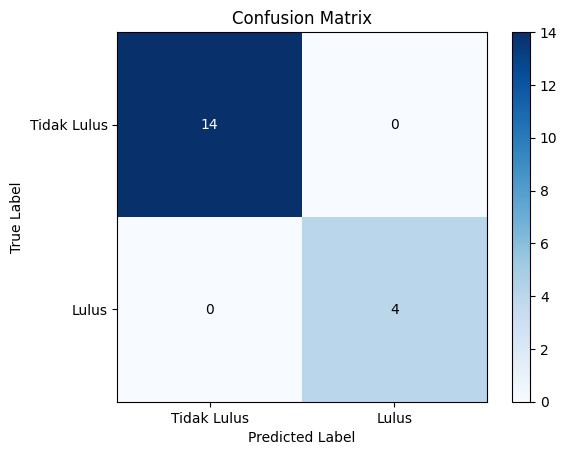

In [ ]:
labels = ['Tidak Lulus', 'Lulus']
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=labels,
       yticklabels=labels,
       title='Confusion Matrix',
       ylabel='True Label',
       xlabel='Predicted Label')

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.show()